In [1]:
import pickle
import numpy as np
from pathlib import Path
import glob
import pandas as pd
import matplotlib.pyplot as plt

# switch the path to represent the correct directory when switching devices and fetch the latest repo from github
# Marc_PC
data_folder = Path(r"C:\Users\marc_\OneDrive\Documents\Studie\Master\Master Internship 1 Neurophysics\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\data")

# Amber_laptop
#data_folder = Path(r"C:\Users\renek\OneDrive\Documenten\Marc Studiemap\Master Internship 1\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\data") 

In [2]:
# path to where the data are on your machine
data_path = data_folder.joinpath('20230211')

In [3]:
# visualize files in session folder
glob.glob(str(data_path)+'/*')

['C:\\Users\\marc_\\OneDrive\\Documents\\Studie\\Master\\Master Internship 1 Neurophysics\\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\\data\\20230211\\behaviour_data.pickle',
 'C:\\Users\\marc_\\OneDrive\\Documents\\Studie\\Master\\Master Internship 1 Neurophysics\\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\\data\\20230211\\neural_data.pickle',
 'C:\\Users\\marc_\\OneDrive\\Documents\\Studie\\Master\\Master Internship 1 Neurophysics\\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\\data\\20230211\\parameters.yml',
 'C:\\Users\\marc_\\OneDrive\\Documents\\Studie\\Master\\Master Internship 1 Neurophysics\\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\\data\\20230211\\trial_data.csv']

# Goal 1: reward licks, fraction of licks during reward presentation, eventplot of licks
1. isolate the reward presentation for each trial. Find the number of licks that happened between the reward presentation and two seconds (2000 frames) after.
2. use eventplot to plot the licks for each trial on the same plot (x axis: time, y axis: trial)

This will tell us if there is a change in licking patterns during the course of the trial

In [4]:
# Trial data
trial_data_file = data_path.joinpath('trial_data.csv')
trial_data = pd.read_csv(trial_data_file)
trial_data

,env_onset,tunnel1_onset,reward_zone_onset,tunnel2_onset,tunnel2_offset,trial_duration,env_label,sound_onset,sound_offset,sound_presented,reward_onset,reward_offset
0,0.0,51742,62734,84207,87311,NaN,1,48182.0,163347.0,True,63550,66561
1,87311.0,117556,120011,154259,158038,NaN,3,NaN,NaN,False,121313,124339
2,158038.0,172831,213693,242507,244749,NaN,1,166359.0,257770.0,True,231849,234863
3,244749.0,266401,269199,339747,342111,NaN,2,260775.0,363012.0,True,270289,273308
4,342111.0,372283,382112,388546,396273,NaN,1,366022.0,399709.0,True,383091,386109
5,396273.0,413147,415210,436766,437438,NaN,2,402721.0,449813.0,True,415977,418985
6,437438.0,459485,462992,471835,474908,NaN,1,452816.0,481899.0,True,464101,467108
7,474908.0,526669,539910,611337,614135,NaN,3,484920.0,617838.0,True,541697,544704
8,614135.0,665133,667664,683879,684559,NaN,3,620845.0,688756.0,True,668392,671403
9,684559.0,696625,700692,720849,724404,NaN,2,691767.0,741830.0,True,702266,705266


In [5]:
# Load behavioural data
bdata_file = data_path.joinpath('behaviour_data.pickle')
with open(bdata_file,'rb') as file:
    b_data = pickle.load(file)

In [6]:
# Calculating some values needed to find the number of licks.
trial_duration  = trial_data['tunnel2_offset'] - trial_data['env_onset'] # full trial duration.

# Define the time frame during the trial in which the reward was presented and licks are part of the desired behaviour.
lick_start = trial_data['reward_onset']
lick_end = trial_data['reward_onset'] + 2000

# Numpy array of the number of licks during the lick time.
licks = b_data['lick_onsets'] 

# Init the lick counter.
lick_counter = 0 

# I.terate through each row in the dataframe.
for i in range(len(lick_start)):
    # Check if the values fall within the range.
    for lick in licks:
        if lick_start[i] <= lick <= lick_end[i]:
            lick_counter += 1
print(lick_counter)

# Compute the fraction of licks that happen at the reward_onset.
reward_licks = lick_counter/len(licks) * 100
print(reward_licks)

200
5.688282138794084


In [7]:
import sys
sys.path.append('../src') # Add src folder to path.

import analysis as an # Import my analysis functions from /src.

In [8]:
# Call the function and print the results.
lick_count, reward_fraction = an.lick_counter(trial_duration, lick_start, lick_end, licks)
print("Number of licks during reward window:", lick_count)
print("Fraction of licks at reward onset:", reward_fraction)

Number of licks during reward window: 200
Fraction of licks at reward onset: 5.688282138794084


200
0.05688282138794084


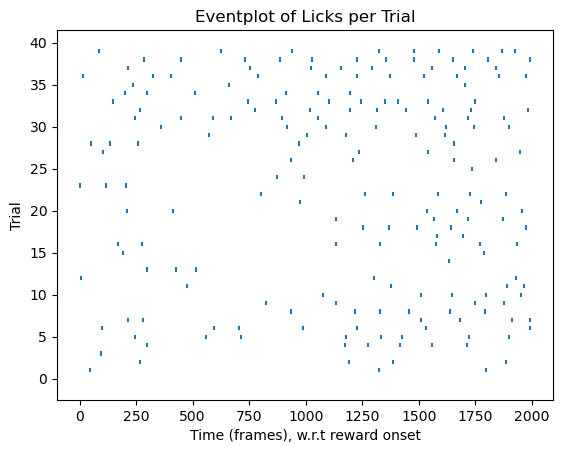

In [9]:
# Calculating some values needed to find the number of licks.
trial_duration  = trial_data['tunnel2_offset'] - trial_data['env_onset'] # full trial duration.

# Define the time frame during the trial in which the reward was presented and licks are part of the desired behaviour.
lick_start = trial_data['reward_onset']
lick_end = trial_data['reward_onset'] + 2000

# Numpy array of the number of licks during the lick time.
licks = b_data['lick_onsets'] 

# Init the lick counter.
lick_counter = 0

# Init list of reward licks.
reward_licks_list = []

# Iterate through each row in the dataframe.
for i in range(len(lick_start)):

    # Init list for adding the licks at the reward zone onset.
    trial_reward_licks = []
    # Check if the values fall within the range.
    for lick in licks:
        if lick_start[i] <= lick <= lick_end[i]:
            lick_counter += 1
            relative_lick_time = lick - lick_start[i] # Lick time with respect to reward onset.
            trial_reward_licks.append(relative_lick_time)

    # Append the list of licks of the trial to the general list, the general list will be a list of lists.
    reward_licks_list.append(trial_reward_licks)
print(lick_counter)

# Compute the fraction of licks that happen at the reward_onset.
reward_licks = lick_counter/len(licks)
print(reward_licks)

# Create the eventplot.
plt.eventplot(reward_licks_list, lineoffsets=1, linelengths=0.5)

# Add axis labels and title.
plt.xlabel('Time (frames), w.r.t reward onset')
plt.ylabel('Trial')
plt.title('Eventplot of Licks per Trial')

# Show the plot.
plt.show()